In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.io import fits
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
import Sigma_psi

In [49]:
filename = "/Users/timotheschmidt/Documents/MINES/2A/Stage PNU/Simu/DATA_SIMS/Output00034_size0128_hyperCube.fits"
file = fits.open(filename)
filename2 = "/Users/timotheschmidt/Documents/MINES/2A/Stage PNU/Simu/DATA_SIMS/Output00034_size0128_cube_temp.fits"
file2 = fits.open(filename2)
np.mean(file[0].data[50, 50,:])

0.9263020630002511

In [122]:
def Tb_u(x, y, u):     
    C = 1.813e18
    L = 50 * 3.086e18 # longueur du cube en cm
    dz = L/128 
    v = file[3].data[x,y,:] # en km/s
    n = file[0].data[x,y,:] 
    T = file2[0].data[x,y,:] 
    k_b = 1.38e-23 
    m = 1.67e-27
    U = np.ones((128,)) * u
    sigma = np.sqrt(k_b*T/m) / 10**3
    
    A = n/sigma * np.exp(-(U - v)**2 /(2 * sigma**2))

    return np.sum(A) * (dz / (C * np.sqrt(2*np.pi))) 
    

In [123]:
def Tb(x, y, u_max, u_min, du):
    du = (u_max - u_min)/1000 
    U = np.arange(u_min, u_max, du)
    Tb = []
    for u in U :
        Tb.append(Tb_u(x, y, u))
    return(Tb)

Text(0, 0.5, '$T_b$ [K]')

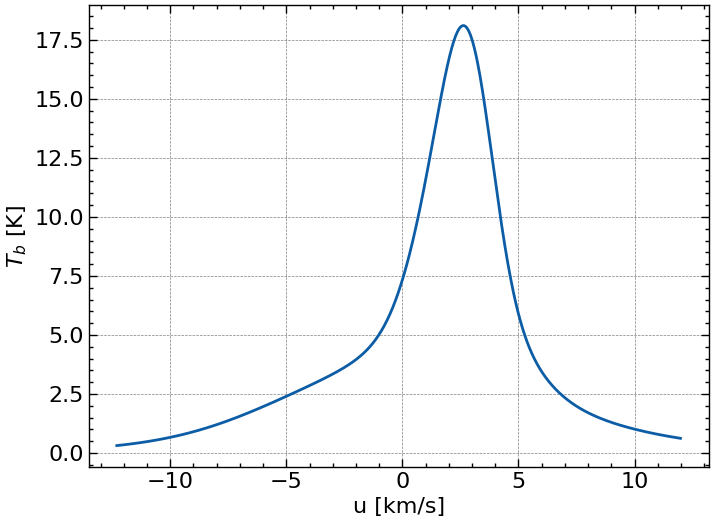

In [124]:
x = 60
y = 50
u_max =  12
u_min = -12.3
du = (u_max - u_min)/1000 


U = np.arange(u_min, u_max, du)
Temp = Tb(x, y, u_max, u_min, du)

plt.plot(U, Temp)
plt.xlabel("u [km/s]")
plt.ylabel("$T_b$ [K]")


In [125]:
def C(x,y):
    """Velocity centroid"""
    Num = 0
    Den = 0
    u_max = 12.1
    u_min = -12.3
    du = 0.1
    n = int((u_max - u_min)/du) + 1
    U = np.linspace(u_min, u_max, n)
    
    for u in U:
        Num += u * Tb_u(x,y,u) 
        Den += Tb_u(x,y,u) 
    
    return Num/Den


In [126]:
def sigma_v(x,y):
    Num = 0
    Den = 0
    u_max = 12.1
    u_min = -12.3
    du = 0.1
    n = int((u_max - u_min)/du) + 1
    U = np.linspace(u_min, u_max, n)
    
    for u in U:
        Num += u**2 * Tb_u(x,y,u) 
        Den += Tb_u(x,y,u) 
    
    return np.sqrt(Num/Den - C(x,y)**2)


In [127]:
sigma_v(10,15)

5.057313328300167

In [115]:
def B(file,x,y,z):

    return np.sqrt(4/3 * np.pi * file[0].data[x,y,z]) * sigma_v(x,y)/Sigma_psi.sigma_psi_global()

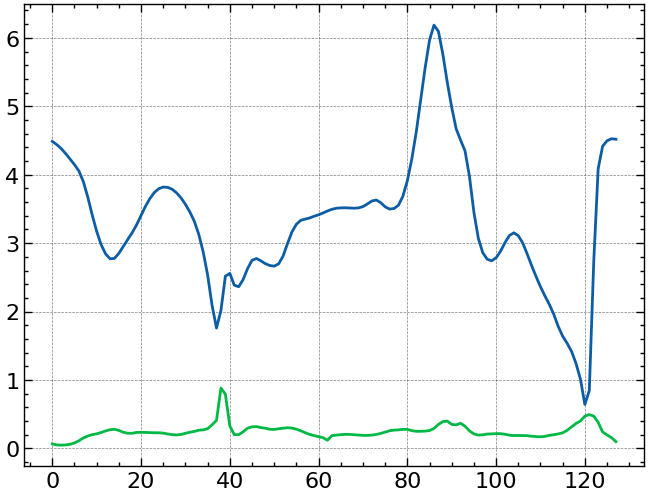

In [116]:
def B_true(y,z):
    B = []
    Bx = file[4].data[:,y,z]
    By = file[5].data[:,y,z]
    B = np.sqrt(Bx**2 + By**2)
    

    return B
B_t = B_true(50,50)
B_exp = [B(file,x,50,50) for x in range(128)]
x = np.arange(0, 128, 1)

plt.plot(x, B_t)
plt.plot(x, B_exp)

### Vérification de la formule de T_b



In [128]:
def N(x,y):
    return np.sum(file[0].data[x,y,:])


def N_Tb(x,y):
    N2 = 0
    for u in U:
        N2 += Tb_u(x,y,u) * du
        
    return N2

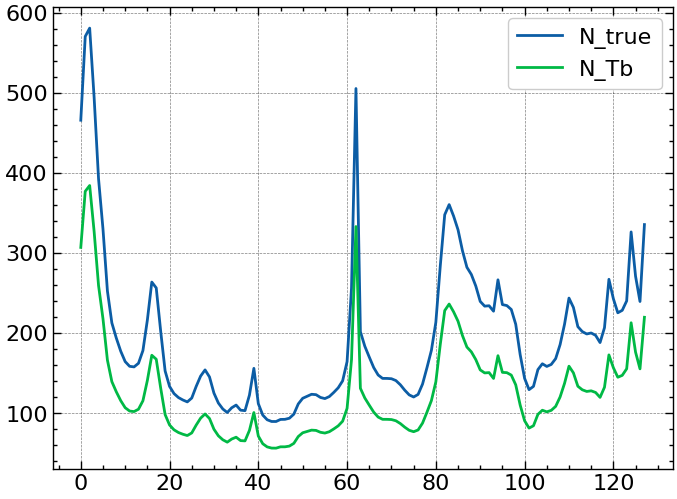

In [129]:
X = np.arange(0, 128, 1)
N1 = [N(x,50) for x in range(128)]
N2 = [N_Tb(x,50) for x in range(128)]
plt.plot(X, N1, label = 'N_true')
plt.plot(X, N2, label = 'N_Tb')
plt.legend()